In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import funs
import seaborn as sns
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
tablas={}
for nodo in [2,3,4,5,6,8]:
    tablas[nodo] = pd.read_csv('medidas_nodo%s.csv'%nodo,parse_dates=True,index_col=0)

,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA,HORA
TIME,,,,,,
2018-05-09 09:38:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09 09:49:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09 09:50:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09 09:51:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09 09:52:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09 09:53:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09 09:54:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09 09:55:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09 09:56:00,NaN,NaN,NaN,NaN,NaN,NaN


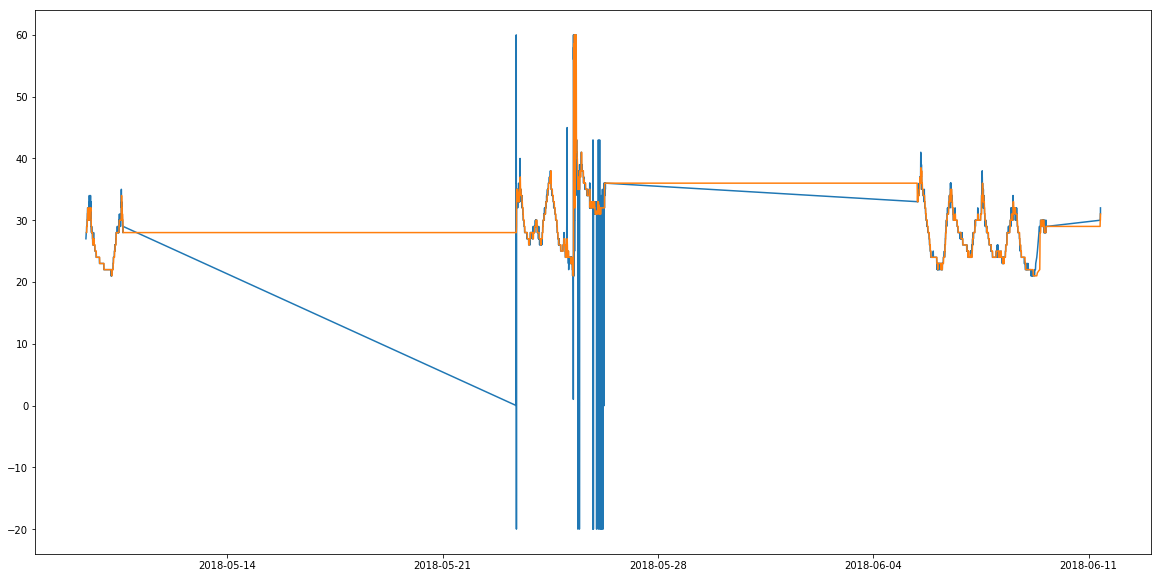

In [13]:
a=tablas[2].rolling(20).median()
plt.figure(figsize=[20,10])
plt.plot(tablas[2].TEMPERATURA)
plt.plot(a.TEMPERATURA)
a

In [4]:
t = 24*60
nodo, periodos = {}, {}
for i in [2,3,4,5,6,8]:
    nodo[i], periodos[i] = funs.separa_datos(tablas[i],t)

In [5]:
separados = nodo[2][1]
inicio = nodo[2][1].index[0]
fin = nodo[2][1].index[-1]
periodos

{2:      Registro Inicial      Registro Final  Registrado  No Registrado  \
 0 2018-05-09 09:38:00 2018-05-10 14:38:00        1722             19   
 1 2018-05-23 09:22:00 2018-05-26 07:01:00        4135             45   
 2 2018-06-05 10:11:00 2018-06-09 15:24:00        5138            936   
 3 2018-06-11 08:51:00 2018-06-11 09:17:00          27              0   
 
    Registrado(%)  No Registrado(%)        Duración  \
 0      98.908673          1.091327 1 days 05:00:00   
 1      98.923445          1.076555 2 days 21:39:00   
 2      84.590056         15.409944 4 days 05:13:00   
 3     100.000000          0.000000 0 days 00:26:00   
 
   Tiempo Hasta el Siguiente Registro  
 0                   12 days 18:44:00  
 1                   10 days 03:10:00  
 2                    1 days 17:27:00  
 3                    0 days 00:00:00  ,
 3:      Registro Inicial      Registro Final  Registrado  No Registrado  \
 0 2018-05-09 09:49:00 2018-05-10 14:38:00        1708             22   
 1 

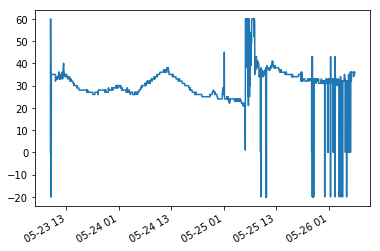

In [66]:
nodo[2][1].TEMPERATURA.plot()

In [41]:
tablas[2]

,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA,HORA
TIME,,,,,,
2018-05-09 09:38:00,40.0,19,74.97,0,5853,9
2018-05-09 09:49:00,40.0,19,72.72,0,5865,9
2018-05-09 09:50:00,40.0,19,72.56,0,5859,9
2018-05-09 09:51:00,40.0,19,72.40,0,5859,9
2018-05-09 09:52:00,28.0,19,72.08,0,5859,9
2018-05-09 09:53:00,40.0,19,71.92,0,5865,9
2018-05-09 09:54:00,28.0,19,71.76,0,5859,9
2018-05-09 09:55:00,28.0,19,71.60,0,5859,9
2018-05-09 09:56:00,28.0,19,71.44,0,5859,9


In [40]:
.TEMPERATURA[[1,3,5,2]]=40

C:\Users\Jergb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [29]:
tablas[2].TEMPERATURA[300]

30

def info_periodo(dataset,inicio,fin):
    registros = len(dataset.loc[inicio:fin,:])+1
    inicio = pd.Timestamp(inicio)
    fin = pd.Timestamp(fin)
    tiempo = fin - inicio
    
    faltantes = funs.transcurrido_fechas(fin, inicio) + 1 - registros
    r_registros = registros / (funs.transcurrido_fechas(fin, inicio) +1)
    n_registros = faltantes / (funs.transcurrido_fechas(fin, inicio) +1)
    info = pd.DataFrame({'Inicio': [inicio], 'Fin': [fin],
                             'Registrado': [registros], 'No Registrado':[faltantes],
                             '% Registrado':[r_registros],'% No Registrado':[n_registros],
                             'Duración':[tiempo]})
    return info

In [ ]:
from time import time
import numpy as np
start_time = time()
a=[]
for i in range(int(1e5)):
    a.append(i)
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

In [ ]:
start_time = time()
a = [i for i in range(int(1e7))]
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)
elapsed_time

In [ ]:
start_time = time()
a = {i for i in range(int(1e7))}
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)
elapsed_time

In [ ]:
start_time = time()
a = np.arange(1e7)
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)
elapsed_time

In [ ]:
a=np.arange(40)
b = {i for i in a if i>30}
b